In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nemo.analysis import Ensemble
# set matplotlib style. You can create your own style file and use it here
plt.style.use(['../nemoview/dashstyle.mplstyle'])

# Absorption Spectrum

In [14]:
# define solvent dielectric constant and refractive index
solvent = (2.38,1.49)

s0 = Ensemble("Ensemble_S0_.lx")
absorption = s0.absorption(solvent)
display(absorption)


,Energy,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,Total,Error
0,2.657677,0.000015,1.991239e-108,2.201016e-259,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000015,0.000015
1,2.667720,0.000030,4.532964e-105,2.892181e-254,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000030,0.000030
2,2.677763,0.000051,9.082202e-102,3.369686e-249,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000051,0.000051
3,2.687807,0.000076,1.601168e-98,3.481086e-244,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000076,0.000076
4,2.697850,0.000099,2.483234e-95,3.188612e-239,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000099,0.000099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,5.901632,0.000000,0.000000e+00,0.000000e+00,5.752354e-268,8.766572e-114,1.142585e-93,2.452964e-57,3.582235e-27,1.123773e-13,0.000077,0.000077,0.000071
324,5.911675,0.000000,0.000000e+00,0.000000e+00,2.372768e-273,1.665332e-117,4.396390e-97,6.334585e-60,5.865261e-29,1.059516e-14,0.000056,0.000056,0.000054
325,5.921718,0.000000,0.000000e+00,0.000000e+00,8.631244e-279,2.744473e-121,1.463939e-100,1.419965e-62,8.294149e-31,8.737247e-16,0.000037,0.000037,0.000036
326,5.931761,0.000000,0.000000e+00,0.000000e+00,2.768855e-284,3.923849e-125,4.220627e-104,2.762802e-65,1.012994e-32,6.301941e-17,0.000022,0.000022,0.000022


## Absorption cross-section vs photon energy in eV

(0.0, 0.7334566016054187)

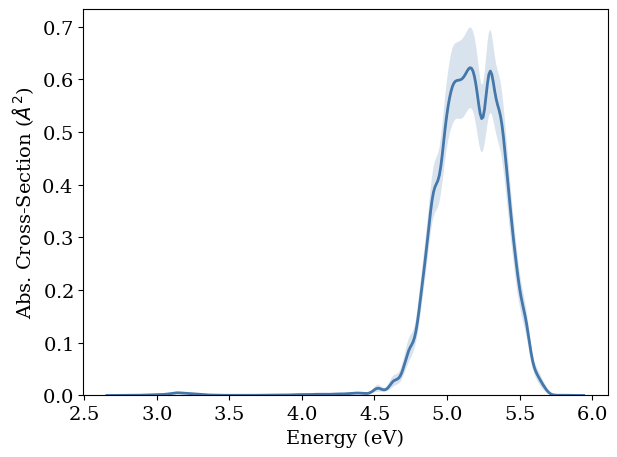

In [15]:
fig, ax = plt.subplots()

x = absorption['Energy']
y = absorption['Total']
err=absorption['Error']

ax.plot(x,y)
ax.fill_between(x,y-err,y+err,alpha=0.2)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Abs. Cross-Section ($\AA^2$)")
ax.set_ylim(bottom=0)

## Molar extinction coefficient vs photon wavelength in nm

(0.0, 19182.69561311059)

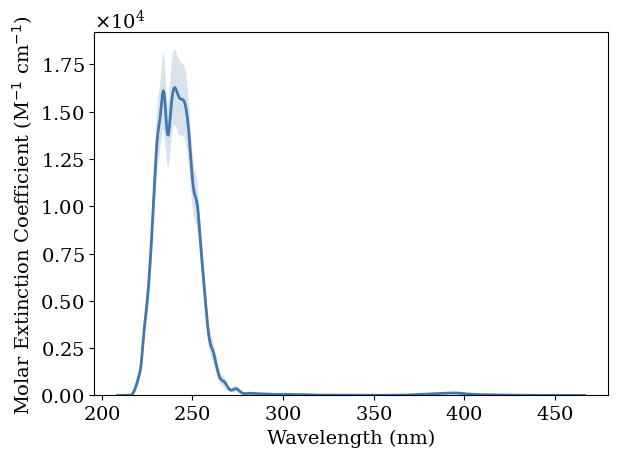

In [16]:
fig, ax = plt.subplots()

absorption = s0.absorption(solvent, wavelength=True, extinction=True)
x = absorption['Energy']
y = absorption['Total']
err=absorption['Error']

ax.plot(x,y)
ax.fill_between(x,y-err,y+err,alpha=0.2)
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Molar Extinction Coefficient (M$^{-1}$ cm$^{-1}$)")
ax.set_ylim(bottom=0)

# Emission Spectrum and Rates

## S1 rates (fluorescence, ISC)

In [17]:
s1 = Ensemble("Ensemble_S1_.lx")

rates = s1.rate(solvent)
display(rates)

,Transition,Rate(s^-1),Error(s^-1),Prob(%),AvgDE+L(eV),AvgSOC(meV),AvgSigma(eV),AvgConc(%)
0,S1->S0,8.339934e+05,4.513493e+04,3.003294e-01,2.771182,NaN,0.040979,40.625524
1,S1~>T1,1.104586e+00,8.512717e-01,3.977724e-07,-0.144296,0.050551,0.026887,0.336279
2,S1~>T2,2.768589e+08,2.768419e+08,9.969967e+01,-0.001597,1.005225,0.027757,0.200025
3,S1~>T3,6.426296e-15,6.426296e-15,2.314173e-21,0.278358,0.903518,0.027316,0.200000
4,S1~>T4,2.336347e-87,2.336347e-87,8.413419e-94,0.579385,0.728501,0.027730,0.200000
5,S1~>T5,1.615183e-128,1.610719e-128,5.816435e-135,0.690217,1.011749,0.027554,0.201108


## Fluorescence differential emission rate vs photon energy in eV

,Energy,Diffrate,Error
0,1.962299,4.678205e-13,4.095675e-13
1,1.972431,7.685531e-13,6.522872e-13
2,1.982563,1.198462e-12,9.794786e-13
3,1.992695,1.777476e-12,1.388266e-12
4,2.002827,2.513329e-12,1.860531e-12
...,...,...,...
142,3.401056,1.695475e-12,1.301804e-12
143,3.411188,1.215970e-12,9.609898e-13
144,3.421320,8.237261e-13,6.690794e-13
145,3.431452,5.264052e-13,4.385873e-13


(0.0, 1.2465793898307117e-09)

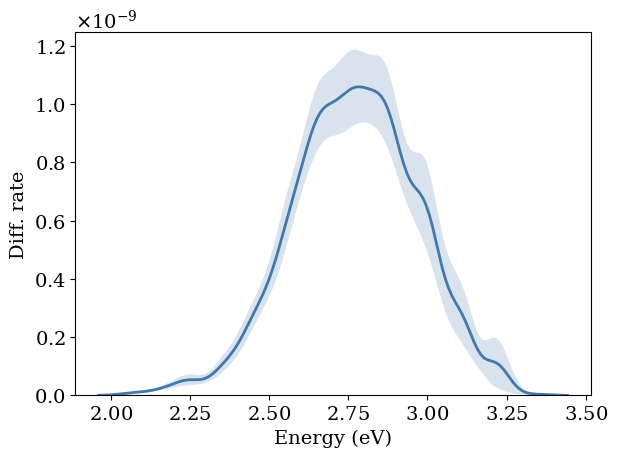

In [18]:
fluor = s1.emission(solvent)
display(fluor)

fig, ax = plt.subplots()

x =    fluor['Energy']
y =    fluor['Diffrate']
err3 = fluor['Error']
ax.plot(x,y)
ax.fill_between(x,y-err3,y+err3,alpha=0.2)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Diff. rate")
ax.set_ylim(bottom=0)



## Fluorescence differential emission rate vs photon wavelength in nm

(0.0, 2.029290230811386e-07)

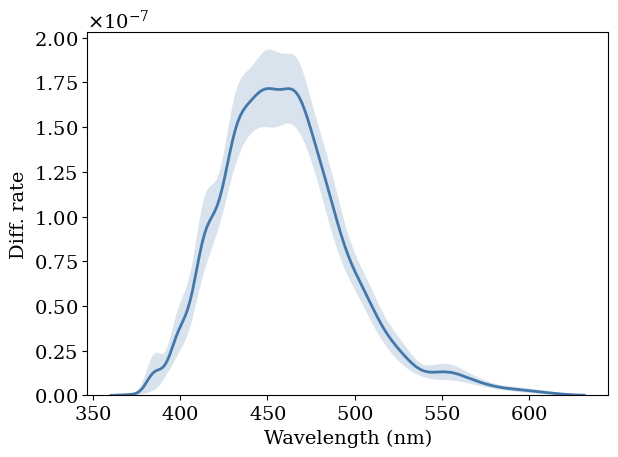

In [19]:
fluor = s1.emission(solvent, wavelength=True)

fig, ax = plt.subplots()

x =    fluor['Energy']
y =    fluor['Diffrate']
err3 = fluor['Error']
ax.plot(x,y)
ax.fill_between(x,y-err3,y+err3,alpha=0.2)
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Diff. rate")
ax.set_ylim(bottom=0)

## T1 rates (phosphorescence, rISC, non-radiative triplet decay)

In [20]:
t1 = Ensemble("Ensemble_T1_.lx")

rates_t1 = t1.rate(solvent)
display(rates_t1)

,Transition,Rate(s^-1),Error(s^-1),Prob(%),AvgDE+L(eV),AvgSOC(meV),AvgSigma(eV),AvgConc(%)
0,T1->S0,2.722761e+00,7.857271e-02,1.452412e+00,2.477709,NaN,0.040880,70.643845
1,T1~>S0,1.406261e-193,0.000000e+00,7.501464e-194,1.257998,0.232336,0.041467,100.000000
2,T1~>S1,1.847421e+02,1.087263e+02,9.854759e+01,0.110799,0.026583,0.027160,0.575250
3,T1~>S2,5.647045e-73,5.647045e-73,3.012322e-73,0.542786,1.103042,0.028144,0.200000
4,T1~>S3,2.327328e-142,2.327328e-142,1.241475e-142,0.721842,0.646424,0.027492,0.200000
5,T1~>S4,0.000000e+00,0.000000e+00,0.000000e+00,1.589304,0.895302,0.028205,0.000000
6,T1~>S5,0.000000e+00,0.000000e+00,0.000000e+00,2.296532,0.789736,0.027399,0.000000


## Phosphorescence differential emission rate vs photon energy in eV

,Energy,Diffrate,Error
0,1.175064,1.468468e-18,1.350075e-18
1,1.185120,2.368392e-18,2.134425e-18
2,1.195177,3.621430e-18,3.186286e-18
3,1.205233,5.256392e-18,4.494993e-18
4,1.215290,7.253194e-18,6.000214e-18
...,...,...,...
181,2.995292,7.341985e-17,3.889976e-17
182,3.005348,5.053718e-17,2.789427e-17
183,3.015405,3.311591e-17,1.889901e-17
184,3.025461,2.060942e-17,1.208922e-17


(0.0, 4.324964860779874e-15)

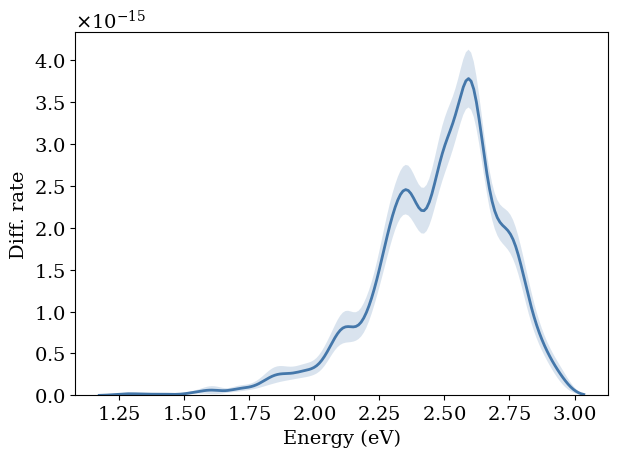

In [21]:
phosph = t1.emission(solvent)
display(phosph)

fig, ax = plt.subplots()

x = phosph['Energy']
y = phosph['Diffrate']
err3 = phosph['Error']
ax.plot(x,y)
ax.fill_between(x,y-err3,y+err3,alpha=0.2)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Diff. rate")
ax.set_ylim(bottom=0)


# Ensemble Analysis

In [22]:
# the breakdown function returns a DataFrame with the main contributions to the relevant rates along with the susceptibilities
# of the states involved, energies and gaussian widths. The solvent is also specified as a tuple (dielectric constant, refractive index).

details = s1.breakdown(solvent)
display(details)

,Geometry,chi_s1,chi_s2,chi_s3,chi_s4,chi_s5,chi_t1,chi_t2,chi_t3,chi_t4,chi_t5,eng,sigma,S1->S0,S1~>T1,S1~>T2,S1~>T3,S1~>T4,S1~>T5
0,1,0.023051,0.072440,0.047856,0.048140,0.061346,0.025684,0.066042,0.045263,0.015074,0.048513,2.528089,0.040638,3.505453e-10,1.363036e-07,3.619327e-106,3.279553e-211,3.032323e-270,0.000000e+00
1,2,0.018602,0.068410,0.067497,0.085692,0.014424,0.021019,0.013918,0.056860,0.055482,0.014701,2.890005,0.040541,4.439692e-10,5.130221e-10,1.453075e-95,6.554215e-192,4.721150e-202,7.416444e-278
2,3,0.022971,0.078406,0.102231,0.088168,0.020501,0.030365,0.052617,0.022582,0.028120,0.089448,2.709221,0.040911,3.513499e-10,8.094520e-08,2.598405e-144,4.738129e-191,0.000000e+00,0.000000e+00
3,4,0.018210,0.053730,0.065524,0.048149,0.028928,0.019459,0.015108,0.020365,0.027608,0.066717,3.045865,0.040096,2.066598e-10,1.468315e-05,1.920000e-69,1.456862e-97,4.572477e-119,2.880102e-178
4,5,0.033960,0.052882,0.074191,0.047542,0.055864,0.038378,0.049605,0.042649,0.018904,0.021146,2.493135,0.041187,1.204599e-10,1.104162e-01,7.024034e-214,5.451417e-249,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.025308,0.071731,0.080845,0.064991,0.035181,0.027621,0.064380,0.070997,0.039667,0.020205,2.327467,0.041222,4.895534e-11,3.135992e-03,2.645633e-120,9.085880e-202,0.000000e+00,0.000000e+00
496,497,0.046965,0.077040,0.061417,0.113972,0.046306,0.047005,0.078662,0.059767,0.037080,0.082852,2.323325,0.041961,1.255103e-10,2.960695e-01,1.175278e-50,1.573474e-217,1.319265e-288,0.000000e+00
497,498,0.023976,0.095167,0.062974,0.045976,0.023714,0.036078,0.027423,0.014442,0.097205,0.060177,3.145111,0.041013,2.696955e-10,2.265932e-11,2.625456e+06,7.546588e-60,2.956084e-121,1.593409e-291
498,499,0.023887,0.092155,0.088825,0.095984,0.026230,0.024713,0.085905,0.056733,0.015250,0.012543,2.595647,0.041217,2.634781e-10,3.481348e-05,6.826881e-117,2.880496e-190,1.209801e-232,5.269000e-278
